<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Aula-1" data-toc-modified-id="Aula-1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Aula 1</a></span><ul class="toc-item"><li><span><a href="#Problema-1" data-toc-modified-id="Problema-1-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Problema 1</a></span></li><li><span><a href="#Problema-2" data-toc-modified-id="Problema-2-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Problema 2</a></span></li></ul></li><li><span><a href="#Aula-2" data-toc-modified-id="Aula-2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Aula 2</a></span></li><li><span><a href="#Aula-3" data-toc-modified-id="Aula-3-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Aula 3</a></span></li></ul></div>

# *Circuitos Elétricos I*

## Aula 1 

### Problema 1

A tensão e a corrente nos terminais de um elemento ideal de dois terminais são nulas para $t < 0$. Para $t ≥ 0$, são dadas por: $v(t) = 400e^{−100t}$ V, $i(t) = 5e^{−100t}$ A. Considera-se o sentido da corrente como sendo o mesmo da queda da tensão entre os terminais.

a) Determine a potência absorvida pelo elemento em $t = 10$ ms.

b) Determine a energia total ($w_{total}=\int_0^\infty p(t)dt$) fornecida ao elemento.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

print("Respostas:")

# a.
t = 10e-3;

v = 400*np.exp(-100*t)  # tensão
i =   5*np.exp(-100*t)  # corrente

p = v*i  # potência
print("a. Potência em t = 10 ms: ", round(p,2), "W")  # valor arredondado em duas casas decimais


# b.
t = np.linspace(0, 0.1, num = 1000)   # tempo

v = 400*np.exp(-100*t)  # tensão
i =   5*np.exp(-100*t)  # corrente

p = v*i  # potência

plt.plot(t, p)
plt.xlim(0, 0.1)
plt.grid()
plt.xlabel('tempo (s)')
plt.ylabel('potência (W)')

energiaTotal = integrate.trapz(p, t) # cálculo da potência total entregue ao elemento
print("b. Energia total = ", round(energiaTotal,2), "J")  # valor da integral arredondado em duas casas decimais

Respostas:
a. Potência em t = 10 ms:  270.67 W
b. Energia total =  10.0 J


### Problema 2

A tensão e a corrente nos terminais de um elemento ideal de dois terminais são nulas para $t < 0$. Para $t ≥ 0$, são dadas por: $v(t) = 400e^{−100t}\sin(200t)$ V, $i(t) = 5e^{−100t}\sin(200t)$ A. Considera-se o sentido da corrente como sendo o mesmo da queda da tensão entre os terminais.

a) Determine a potência absorvida pelo elemento em $t = 10$ ms.

b) Determine a energia total ($w_{total}=\int_0^\infty p(t)dt$) fornecida ao elemento.

Respostas:

a. Potência em t = 10 ms:  223.8 W

b. Energia total =  4.0 J


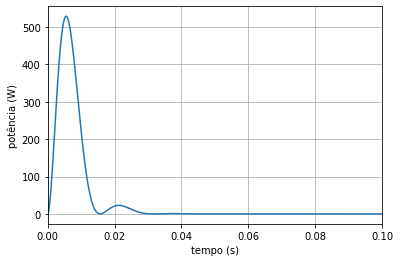

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate


print("Respostas:\n")

# a.
t = 10e-3;

v = 400*np.exp(-100*t)*np.sin(200*t)  # tensão
i =   5*np.exp(-100*t)*np.sin(200*t)  # corrente

p = v*i  # potência
print("a. Potência em t = 10 ms: ", round(p,2), "W\n")  # valor arredondado em duas casas decimais


# b.
t = np.linspace(0, 0.1, num = 1000)   # tempo

v = 400*np.exp(-100*t)*np.sin(200*t)  # tensão
i =   5*np.exp(-100*t)*np.sin(200*t)  # corrente

p = v*i  # potência

plt.plot(t, p)
plt.xlim(0, 0.1)
plt.grid()
plt.xlabel('tempo (s)')
plt.ylabel('potência (W)')

energiaTotal = integrate.trapz(p, t) # cálculo da potência total entregue ao elemento
print("b. Energia total = ", round(energiaTotal,2), "J")  # valor da integral arredondado em duas casas decimais

## Aula 2

Exemplo do livro texto:

a. Use as leis de Kirchhoff e lei de Ohm para determinar a corrente $i_0$ no circuito abaixo.

b. Teste a solução para $i_0$ verificando se a potência total gerada é igual à potência total dissipada.



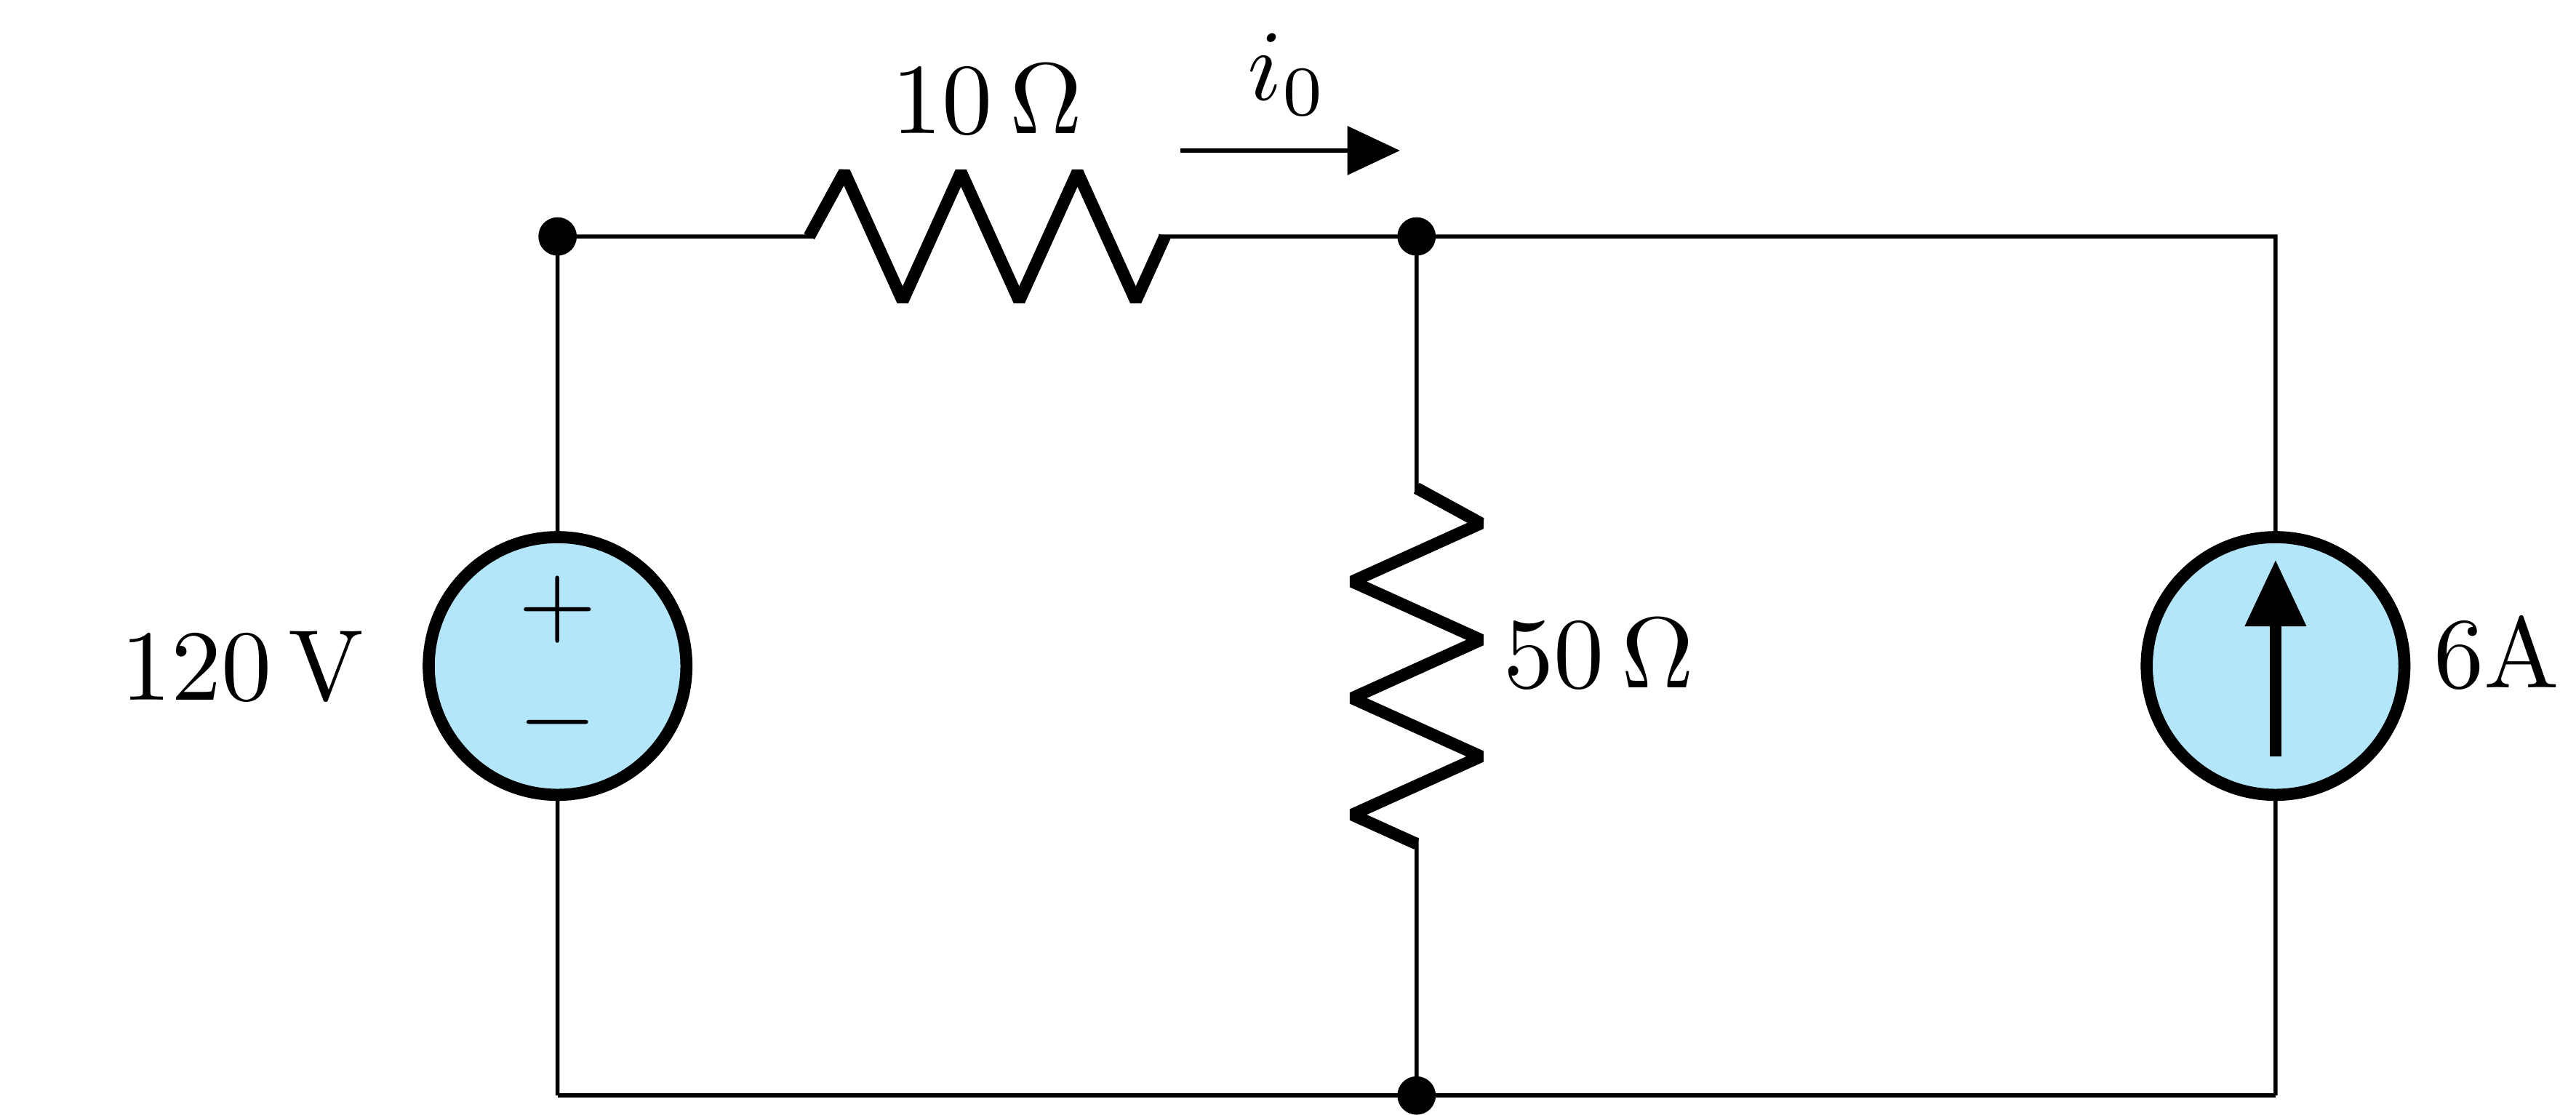

In [3]:
from IPython.display import Image
Image("figuras/A2C1.png", width=500)

Antes de aplicar as leis de Kirchhoff para resolver o circuito, precisamos atribuir variáveis às correntes e tensões que são desconhecidas em cada um dos elementos bipolares (de dois terminais). A atribuição é feita de forma arbitrária. Uma das possíveis configurações escolhidas está mostrada na figura abaixo:

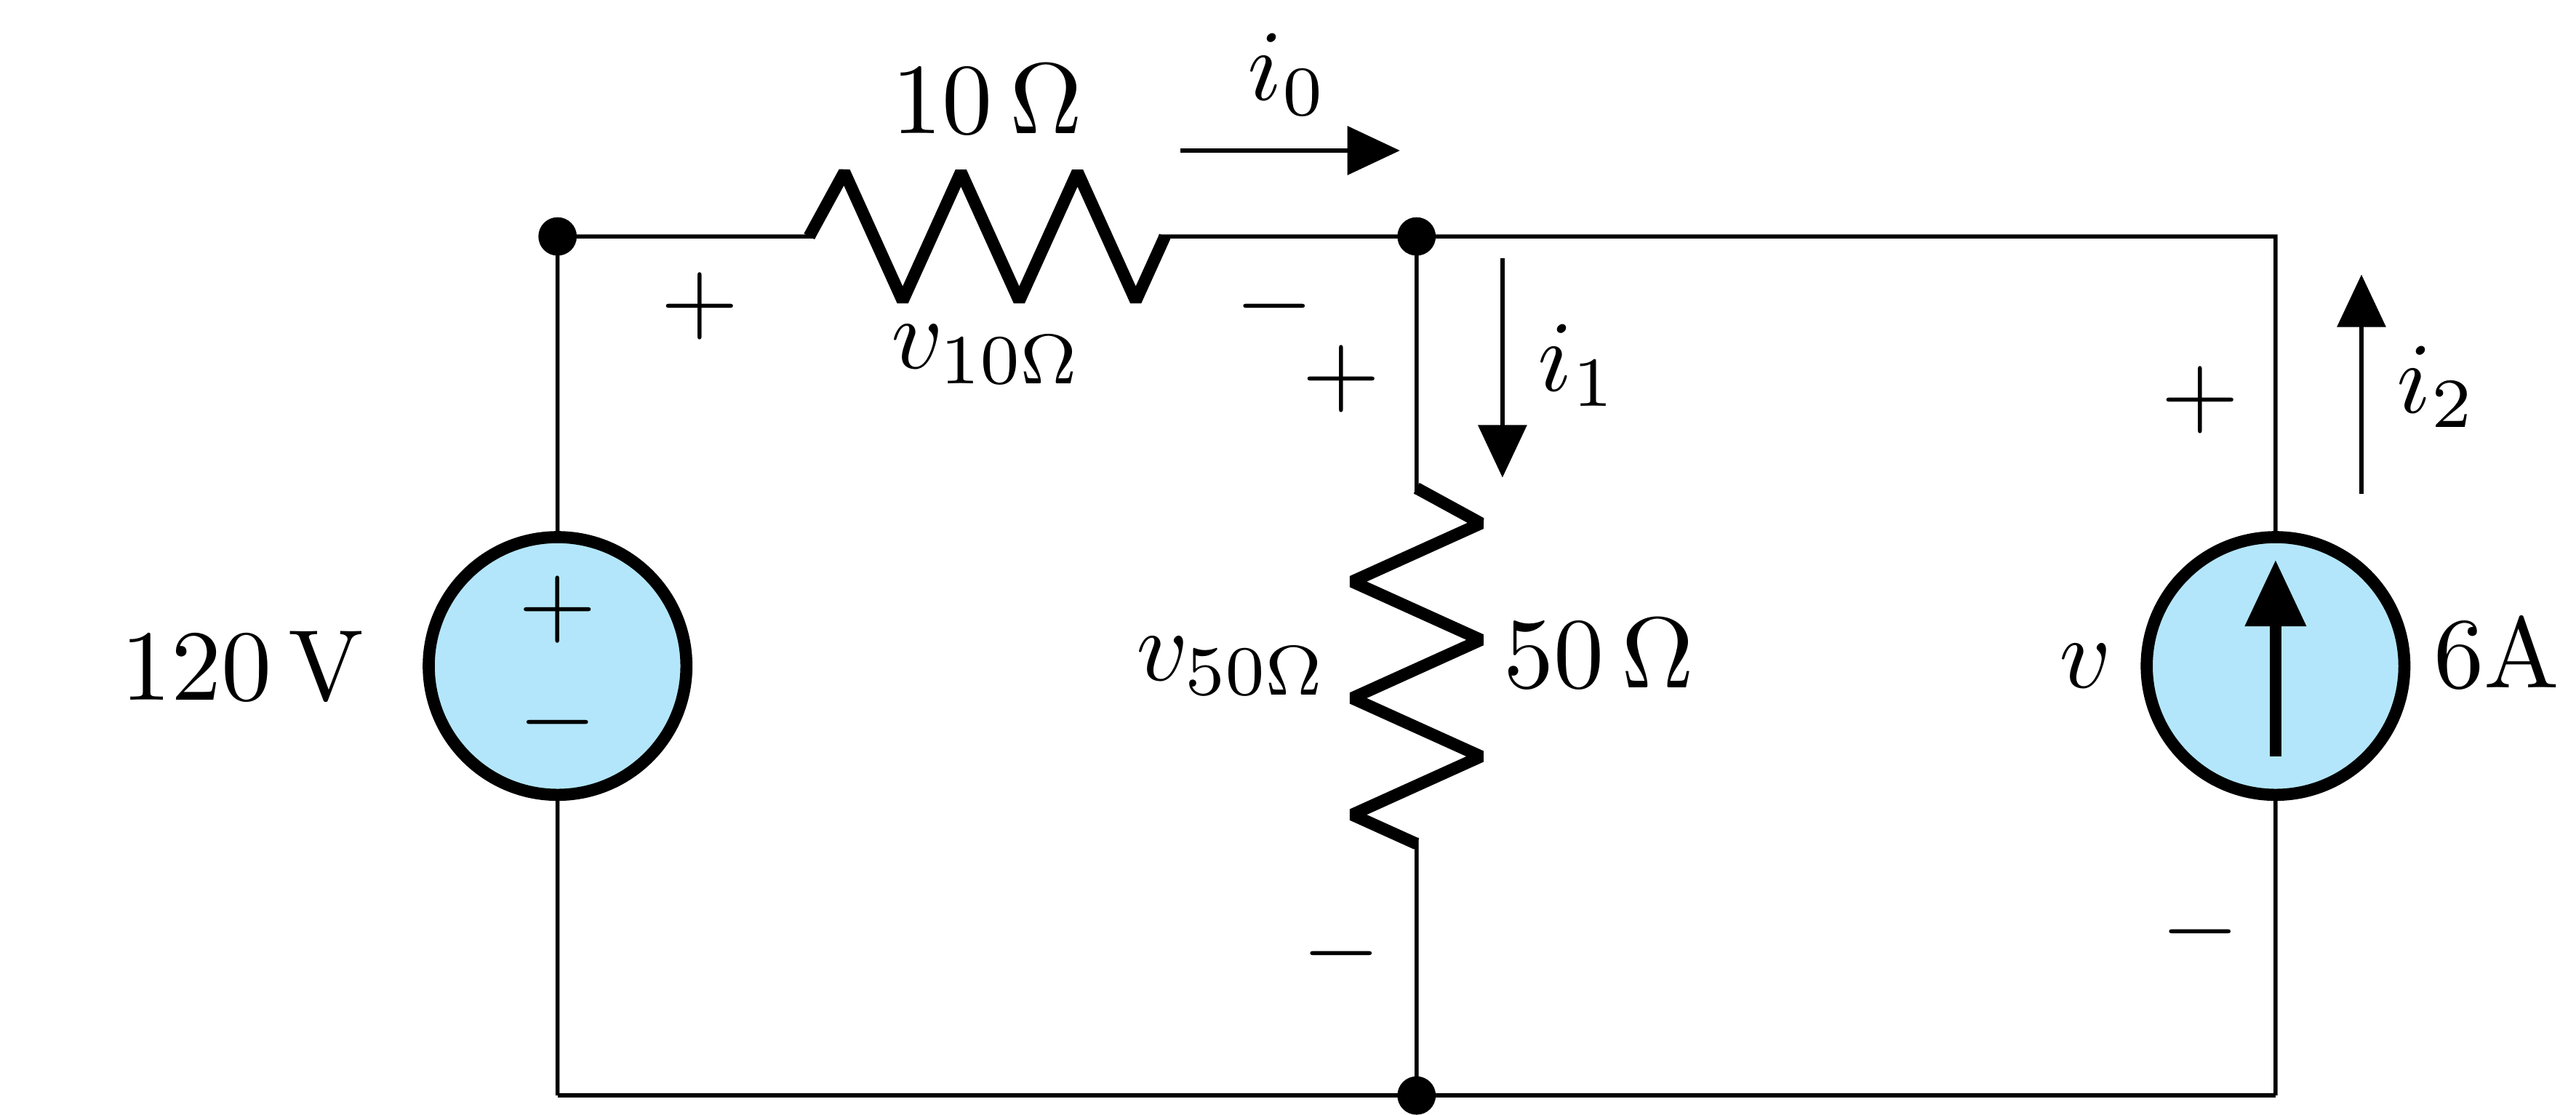

In [4]:
Image("figuras/A2C2.png", width=500)

Aplicando a LKT à malha simples que contém a fonte de 120 V, temos: 

\begin{equation*}
-120+v_{10\Omega}+v_{50\Omega}=0
\label{eq:eq1} \tag{1}
\end{equation*}

Aplicando a lei de Ohm aos dois resistores e **observando a convenção passiva**, temos: $v_{10\Omega}=10i_0$ e $v_{50\Omega}=50i_1$. Substituindo na equação $\eqref{eq:eq1}$: 

\begin{equation*}
10i_0+50i_1=120
\label{eq:eq2} \tag{2}
\end{equation*}

Aplicando a LKC ao nó interligando os dois resistores e a fonte de corrente, temos $i_0+6=i_1$, ou seja:

\begin{equation*}
i_0-i_1=-6
\label{eq:eq3} \tag{3}
\end{equation*}

Resolvendo o sistema formado pelas equações $\eqref{eq:eq2}$ e $\eqref{eq:eq3}$, obtemos as correntes $i_0$ e $i_1$. A seguir, temos um trecho de código que resolve o sistema linear e calcula as potências desenvolvidas por cada elemento do circuito.

In [5]:
import numpy as np

print("Respostas:\n")
#a.

# Fontes independentes
i2 = 6    #A
V1 = 120  #V

# Resistores
R1 = 10   #Ohms
R2 = 50   #Ohms

# Equações de resolução do circuito: LKT: (I) 10*i0 + 50*i1 = V1, LKC: (II) i0 - i1 = -i2 

# Define o problema em termos de um sistema A*x = b, em que x = [i0, i1] é o vetor de incógnitas
A = np.array([[R1, R2], [1, -1]])
b = np.array([V1, -i2])    

x = np.linalg.solve(A, b) # resolve o sistema de equações lineares

i0 = x[0]
i1 = x[1]

print("a. Solução do sistema: i0 =", round(x[0],2), "A, i1 =", round(x[1],2), "A \n")  # Solução do sistema

#b. Cálculo das potências observando a convenção passiva:
V     = R2*i1;

p_120V = -V1*i0
p_6A   = -V*i2
p_R1   = R1*i0**2
p_R2   = R2*i1**2

print( "b. Potências: p120V = ", round(p_120V,2), "W, p6A = ", round(p_6A,2), "W, pR1 = ", round(p_R1,2), "W, pR2 = ", round(p_R2,2), "W")
print('\n Somatório das potências:', round(p_120V+p_6A+p_R1+p_R2))

Respostas:

a. Solução do sistema: i0 = -3.0 A, i1 = 3.0 A 

b. Potências: p120V =  360.0 W, p6A =  -900.0 W, pR1 =  90.0 W, pR2 =  450.0 W

 Somatório das potências: 0.0


## Aula 3

Problema (Nilsson, 2.31): para o circuito mostrado a seguir:

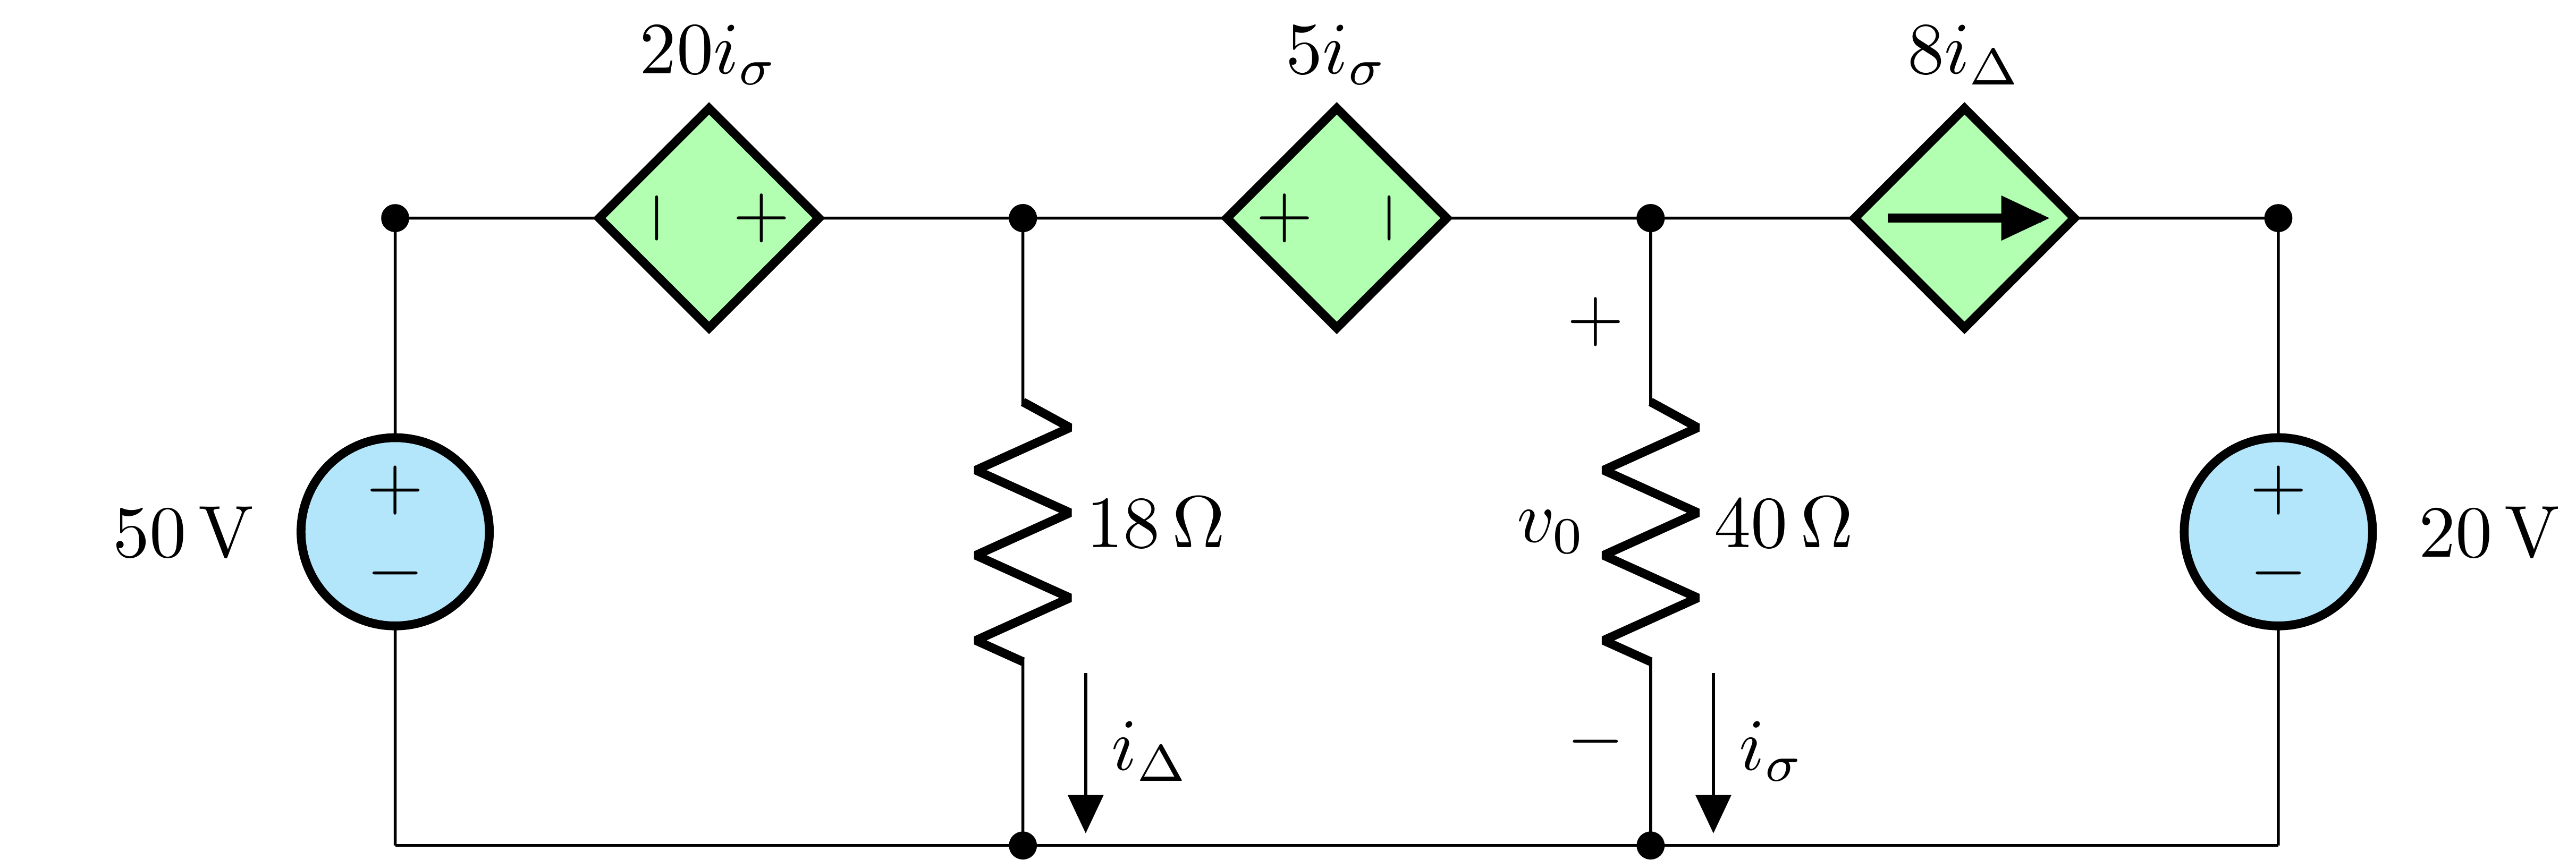

In [6]:
Image("figuras/A3C2.png", width=800)

a. Determine $i_{\Delta}$ e $v_0$.

b. Mostre que a potência fornecida equivale à potência consumida no circuito.

Antes de aplicar as leis de Kirchhoff para resolver o circuito, precisamos atribuir variáveis às correntes e tensões que são desconhecidas em cada um dos elementos bipolares (de dois terminais). A atribuição é feita de forma arbitrária. Uma das possíveis configurações escolhidas está mostrada na figura abaixo:

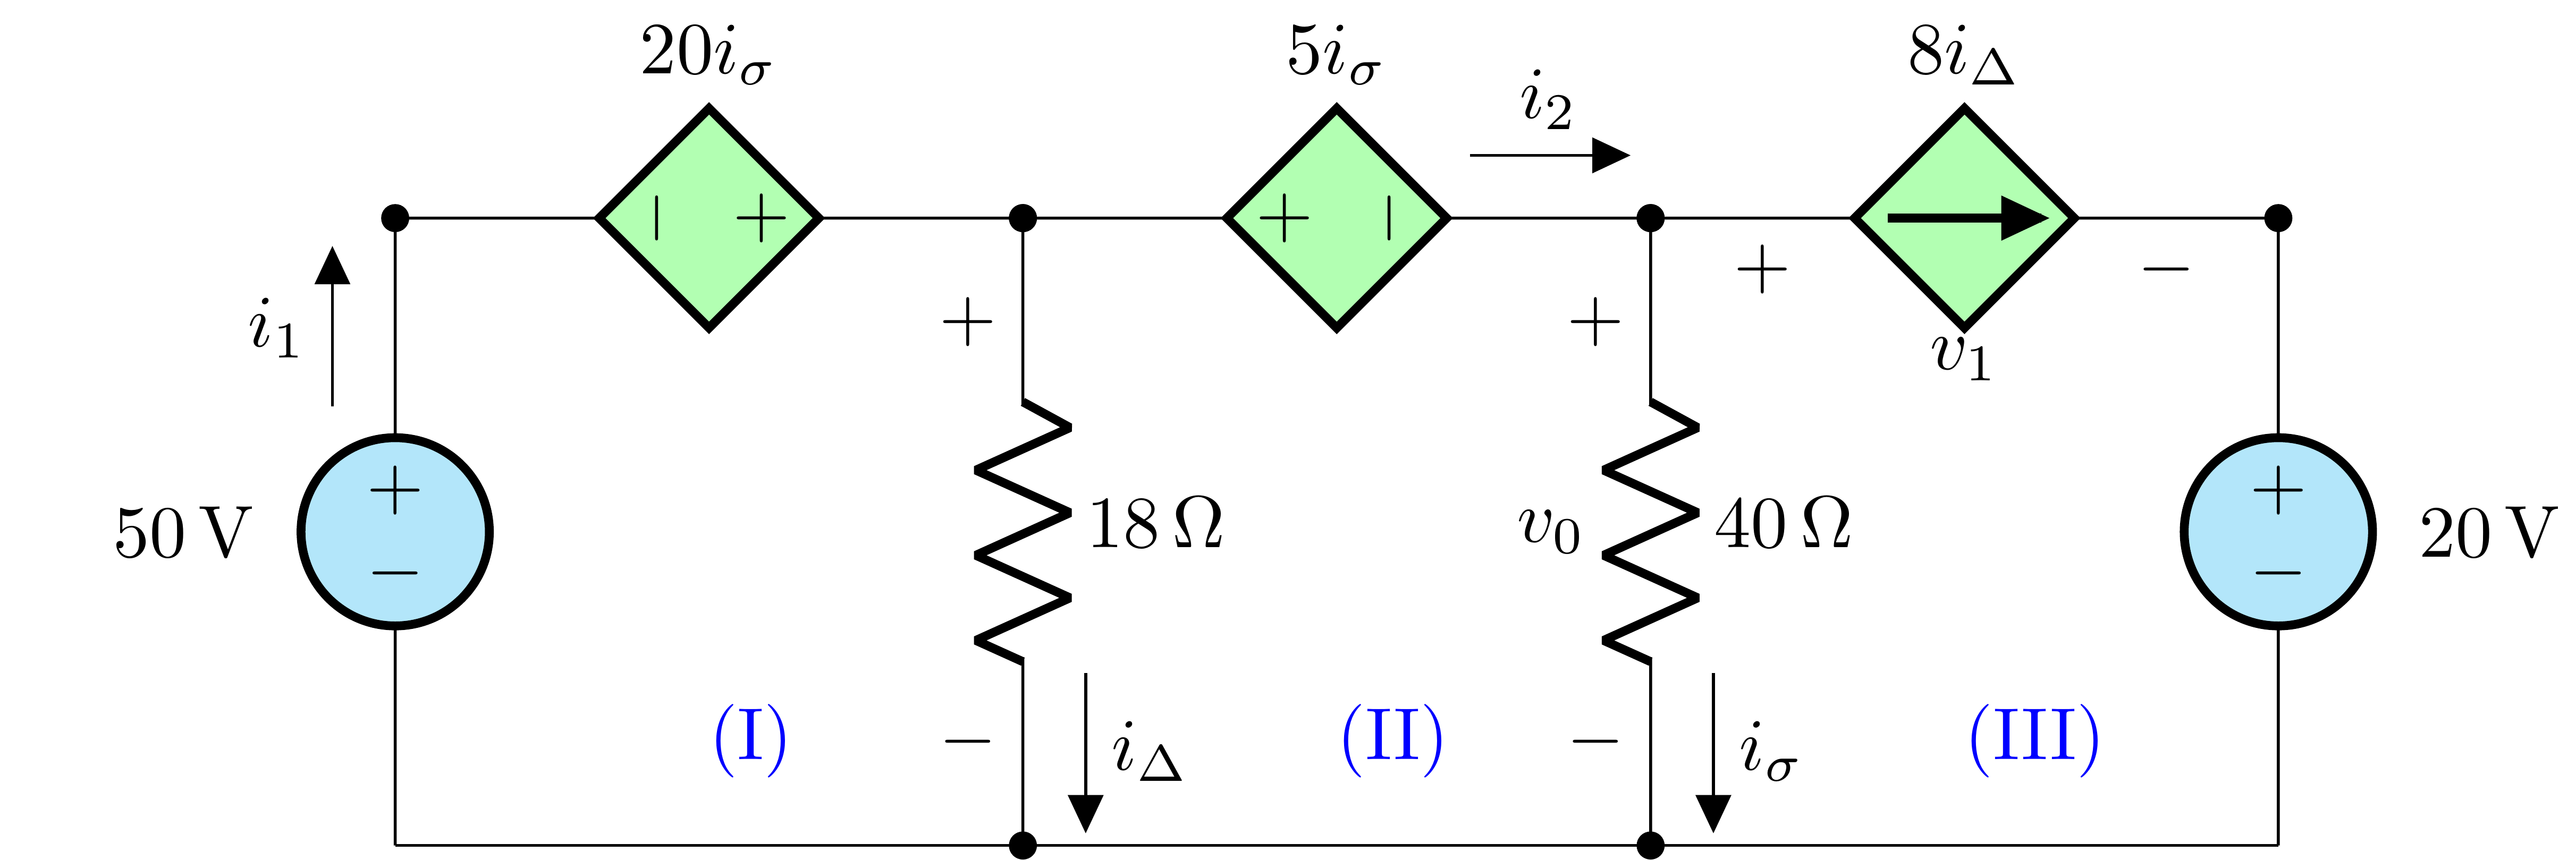

In [7]:
Image("figuras/A3C3.png", width=800)

Para facilitar a manipulação do código, vamos definir: $V_{S1}= 50 V$, $V_{S2}= 20 V$, $R_1= 18 \Omega$, $R_2= 40 \Omega$, $k_1=20$, $k_2=5$, $k_3=8$. Desse modo, aplicando LKT às malhas (I) e (II) do circuito, obtemos o seguinte sistema de equações na forma matricial:

$$\begin{bmatrix} k_1 & -R_1  \\ R_2+k_2 & -R_1  \end{bmatrix}\begin{bmatrix} i_{\sigma}  \\ i_{\Delta}  \end{bmatrix}=\begin{bmatrix} -V_{S1} \\ 0  \end{bmatrix}$$

In [11]:
import numpy as np

print("Respostas:\n")
#a.

# Fontes independentes
Vs1 = 50  #V
Vs2 = 20  #V

# Constantes atribuídas as fontes dependentes nas malhas (I), (II) e (III), respectivamente
k1 = 20
k2 = 5
k3 = 8

# Resistores
R1 = 18   #Ohms
R2 = 40   #Ohms

# Equações de resolução do circuito aplicando LKT: 
#    
# malha (I)  -Vs1 -k1*i_sigma + R1*i_delta = 0         ->     k1*i_sigma-R1*i_delta = -Vs1 
# malha (II) -R1*i_delta + k2*i_sigma + R2*isigma = 0  -> (R2+k2)*i_sigma-R1*i_delta = 0
# 

# Define o problema em termos de um sistema A*x = b, em que x = [isigma, idelta] é o vetor de incógnitas
A = np.array([[k1, -R1], [(R2+k2), -R1]])
b = np.array([-Vs1, 0])    

x = np.linalg.solve(A, b) # resolve o sistema de equações lineares

isigma = x[0]
idelta = x[1]

# Determinando as correntes restantes via LKC:
i1 = idelta + isigma + k3*idelta
i2 = i1 - idelta

v0 = R2*isigma  # tensão sobre R2
v1 = v0-Vs2     # tensão sobre a fonte dependente de corrente

print("a. Solução do sistema: idelta =", round(idelta,2), "A, v0 =", round(v0,2), "V \n")  # Solução do sistema

#b. Cálculo das potências observando a convenção passiva:

p_50V   = -Vs1*i1
p_20V   = Vs2*(k3*idelta)
p_20is  = -(k1*isigma)*i1
p_5is   = (k2*isigma)*i2
p_8id   = v1*(k3*idelta)
p_R1    = R1*idelta**2
p_R2    = R2*isigma**2

print( "b. Potências:\t p_50V  = ", round(p_50V,2), "W, p_20V = ", round(p_20V,2), "W, pR1   = ", round(p_R1,2), "W, pR2  = ", round(p_R2,2), "W")
print( "\t\t p_20is = ", round(p_20is,2), "W, p_5is = ", round(p_5is,2), "W, p_8id = ", round(p_8id,2), "W")
print('\n Somatório das potências:', round(p_50V+p_20V+p_20is+p_5is+p_8id+p_R1+p_R2,2))

Respostas:

a. Solução do sistema: idelta = 2.78 A, v0 = 44.44 V 

b. Potências:	 p_50V  =  -1305.56 W, p_20V =  444.44 W, pR1   =  138.89 W, pR2  =  49.38 W
		 p_20is =  -0.0 W, p_5is =  129.63 W, p_8id =  543.21 W

 Somatório das potências: 0.0
